# Question:1

In [35]:
#importing libraries
import pkg_resources
import cmapPy
pkg_resources.get_distribution("cmapPy").version

'4.0.1'

In [36]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#parsing the gct data using cmappy
from cmapPy.pandasGEXpress.parse import parse
data_row = parse('PAAD.gct',).data_df                     #expressional data
data_col = parse('PAAD.gct',col_meta_only=True).T         #informational data

In [38]:
#setting index and visualize the top 5 data row of expressional data
data_row=data_row.set_index(data_row.axes[0]) 
data_row.head(5)

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,...,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,...,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70


In [39]:
#visualize the top 5 data row of informational data
data_col.head(5)

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
chd,,,,,,,,,,,,,,,,,,,,,
participant_id,aab1,aab4,aab6,aab8,aab9,aaba,aabe,aabf,aabh,aabi,...,aauh,aaui,aaul,a8t3,a8t5,a89d,a89d,a8sy,a8lh,aapl
sample_type,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,...,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Solid Tissue Normal,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor
mRNAseq_cluster,1,2,3,1,4,3,3,2,2,3,...,2,5,3,4,5,NaN,2,3,1,5
bcr_patient_barcode,tcga-2j-aab1,tcga-2j-aab4,tcga-2j-aab6,tcga-2j-aab8,tcga-2j-aab9,tcga-2j-aaba,tcga-2j-aabe,tcga-2j-aabf,tcga-2j-aabh,tcga-2j-aabi,...,tcga-xd-aauh,tcga-xd-aaui,tcga-xd-aaul,tcga-xn-a8t3,tcga-xn-a8t5,tcga-yb-a89d,tcga-yb-a89d,tcga-yh-a8sy,tcga-yy-a8lh,tcga-z5-aapl
bcr_patient_uuid,75119d1a-93e5-4ae7-9d60-69ee929a0772,33833131-1482-42d5-9cf5-01cade540234,70797499-16e6-48cc-8ae4-1e692713dad3,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,a5748656-5330-417a-8938-01f69ddb3576,e3a19e63-bae5-498b-9687-41194aa5728d,58c1c391-5ea3-4432-bb1e-e7e1974954bc,886d6116-d496-444f-9b7b-7449dad31055,c53328b4-0930-4e6a-a648-283b5565295e,2aaf212f-000a-4a9d-8a4a-198fa94f491e,...,b46b5a4c-59fc-4769-b05a-d15f9aaa753a,9a2db69e-d429-45d4-89ca-a2c4e0cfc116,597a5a56-244b-4218-a55d-5d08217ea28c,dd7bcdd8-1660-4dab-9860-9d136c4cee77,382b279f-87e1-4dbc-a2ca-c1dfde1cf254,b84b58c7-95b8-4162-8e61-414f8fe422c6,b84b58c7-95b8-4162-8e61-414f8fe422c6,503d7e36-df78-428d-9971-09ff707645c2,ede2e8a7-465e-4725-880d-519899aba0c0,6a4e10b6-e6c4-4210-ae4d-0d8e8d0cb3ec


In [40]:
#shape of expressional data
data_col.shape

(124, 183)

In [41]:
#checking null value and counting 
data_row.isnull().sum().sum()

134954

In [42]:
#dropping null values
data_row = data_row.dropna()

In [43]:
#checking null value and counting after dropping null values
data_row.isnull().sum().sum()

0

In [44]:
#Slicing two informational columns
data_col=data_col.loc[['histological_type','histological_type_other']]

In [45]:
#visuslising sliced informational column
data_col.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
chd,,,,,,,,,,,,,,,,,,,,,
histological_type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,NaN,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type
histological_type_other,invasive adenocarcinoma,"invasive, well-differentiated",NaN,NaN,NaN,NaN,NaN,NaN,invasive adenocarcinoma,poorly differentiated adenocarcinoma,...,NaN,NaN,NaN,NaN,moderately differentiated ductal adenocarcinom...,NaN,NaN,NaN,NaN,NaN


In [46]:
#checking null value and counting row wise
for i in range(len(data_col.index)) :
    print("Nan in row ", i , " : " ,  data_col.iloc[i].isnull().sum())

Nan in row  0  :  1
Nan in row  1  :  156


In [47]:
#taking most occurence value for imputing in place of null
data_col.loc['histological_type'].mode()

0    pancreas-adenocarcinoma ductal type
dtype: object

In [48]:
#filling null values by most occurence value 
data_col.loc['histological_type'].fillna('pancreas-adenocarcinoma ductal type',inplace=True)
data_col.loc['histological_type_other'].fillna('pancreas-adenocarcinoma ductal type',inplace=True)

In [49]:
#checking null value and counting 
data_col.isnull().sum().sum()

0

In [50]:
#visuslising sliced informational column
data_col.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
chd,,,,,,,,,,,,,,,,,,,,,
histological_type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type
histological_type_other,invasive adenocarcinoma,"invasive, well-differentiated",pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,invasive adenocarcinoma,poorly differentiated adenocarcinoma,...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,moderately differentiated ductal adenocarcinom...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type


In [51]:
#checking unique values in data
data_col.iloc[1,].unique()

array(['invasive adenocarcinoma', 'invasive, well-differentiated',
       'pancreas-adenocarcinoma ductal type',
       'poorly differentiated adenocarcinoma', 'neuroendocrine',
       'neuroendocrine carcinoma nos',
       '82463 neuroendocrine carcinoma nos', 'neuroendocrine carcinoma',
       'adenocarcinoma, nos',
       'poorly differentiated pancreatic adenocarcinoma', 'not specified',
       'intraductal tubulopapillary neoplasm',
       'ductal and micropapillary', 'adenocarcinoma- nos',
       'moderately differentiated ductal adenocarcinoma 60% + neuroendocrine 40%'],
      dtype=object)

In [52]:
dataset = data_row.transpose()

In [53]:
#visuslising expressional column
dataset.head()

rid,SLC35E2,A1BG,A2LD1,A2M,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,7.45,6.4,7.5,14.3,10.6,9.4,10.2,4.8,10.2,9.6,...,8.6,8.1,8.6,6.2,9.0,9.9,9.2,12.9,10.1,9.3
aab4-Primary solid Tumor,8.10,5.8,6.8,14.0,10.2,9.1,10.3,6.3,10.4,9.8,...,8.7,8.1,8.8,5.8,8.5,10.0,9.3,12.4,9.8,8.9
aab6-Primary solid Tumor,7.20,6.4,7.3,13.1,10.1,9.7,9.2,5.9,9.9,9.8,...,8.8,8.4,9.1,3.9,8.1,10.0,9.4,13.5,9.8,9.2
aab8-Primary solid Tumor,8.00,5.8,7.5,13.8,8.6,9.6,9.4,6.4,10.5,9.2,...,8.6,8.6,8.9,5.2,8.5,9.7,9.4,12.5,9.7,9.3
aab9-Primary solid Tumor,7.65,6.7,7.4,14.6,10.1,9.8,9.3,6.5,10.1,9.8,...,8.9,8.2,8.4,5.9,8.6,9.9,9.3,13.0,10.1,9.2


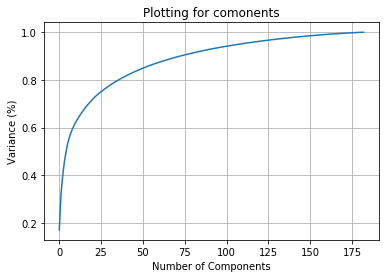

In [54]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(dataset)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Plotting for comonents')
plt.show()

In [55]:
#applying pca to dataset
n_components=125
pca = PCA(n_components)
df = pca.fit_transform(dataset)

In [56]:
pca.explained_variance_ratio_.cumsum()

array([0.17050815, 0.31896496, 0.39602336, 0.45375425, 0.49700165,
       0.53298724, 0.5587615 , 0.5792465 , 0.59671247, 0.6118015 ,
       0.624949  , 0.6367032 , 0.6482121 , 0.65853715, 0.6685346 ,
       0.67816794, 0.6873111 , 0.6957767 , 0.7040463 , 0.7118903 ,
       0.7194733 , 0.7263527 , 0.7329373 , 0.73919886, 0.74517363,
       0.7507178 , 0.7562188 , 0.7615757 , 0.76671994, 0.7717    ,
       0.7764329 , 0.7810185 , 0.78551817, 0.7899429 , 0.79415125,
       0.7983349 , 0.8024278 , 0.80628073, 0.81003976, 0.8137593 ,
       0.81736094, 0.82092154, 0.82438356, 0.8278061 , 0.8311107 ,
       0.8343442 , 0.83750653, 0.8405475 , 0.84354293, 0.8464943 ,
       0.84933954, 0.8521501 , 0.8549266 , 0.8575888 , 0.8602139 ,
       0.8627811 , 0.8653266 , 0.86778826, 0.87018794, 0.8725659 ,
       0.8748946 , 0.8771474 , 0.87936825, 0.8815613 , 0.8836999 ,
       0.8857838 , 0.88785046, 0.8898999 , 0.8919103 , 0.8938587 ,
       0.8957862 , 0.89767224, 0.8995288 , 0.9013732 , 0.90318

In [57]:
df.shape

(183, 125)

In [58]:
#placing column name and generating dataframe
df1=pd.DataFrame(df,columns=['PCA'+str(i) for i in range(1,n_components+1)],index=None)

In [59]:
#visualize the top 5 row
df1.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA116,PCA117,PCA118,PCA119,PCA120,PCA121,PCA122,PCA123,PCA124,PCA125
0,19.377615,-14.983466,-2.223572,-29.369314,1.294351,-0.555344,-13.681505,-10.432124,-0.366852,-5.874002,...,-4.647801,-2.421468,2.974543,-7.888126,2.364514,-0.470857,-2.209826,-6.431137,0.896279,-3.271887
1,6.459736,-7.324426,-1.891246,-27.630228,-16.984486,6.185786,6.002569,-13.808433,-11.949418,-14.811068,...,1.283305,-1.028445,-7.839479,-5.379380,8.657167,-4.665471,3.593615,-0.108637,1.211165,2.326349
2,22.107014,-12.287159,-8.406857,52.940910,-28.743177,-6.388737,12.774988,-13.569407,-22.681734,1.003773,...,0.848155,3.669878,2.971299,0.379582,-2.751571,-0.019932,-1.150216,2.584731,0.330297,0.395353
3,14.004169,-25.846373,2.487084,13.669195,-4.051844,13.900233,-19.943539,6.014203,9.325456,9.484848,...,0.652978,-0.452074,2.970882,0.186711,4.680226,0.125146,1.932493,-3.366086,0.130976,-1.290869
4,-14.081422,-4.000463,-13.408875,-10.858805,-13.067190,-16.657902,20.383518,9.752702,-0.402806,-2.505419,...,-6.292983,-1.477897,4.616715,-2.655114,-0.403242,-4.081460,2.745739,-1.466609,0.972502,-0.325315


In [82]:
df1.describe()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA116,PCA117,PCA118,PCA119,PCA120,PCA121,PCA122,PCA123,PCA124,PCA125
count,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000,1.830000e+02,...,183.000000,183.000000,183.000000,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,183.000000,183.000000,1.830000e+02
mean,-0.000003,-0.000001,-0.000001,0.000002,-0.000002,-4.377521e-07,0.000002,0.000002,-0.000003,7.087416e-07,...,-0.000001,-0.000001,-0.000002,-5.628242e-07,4.169068e-07,-2.397214e-07,-3.452509e-08,0.000001,0.000001,5.237392e-07
std,42.842758,39.976509,28.801487,24.929235,21.576693,1.968199e+01,16.657047,14.849883,13.712009,1.274488e+01,...,3.252296,3.221811,3.199123,3.170442e+00,3.141742e+00,3.135101e+00,3.108202e+00,3.087916,3.042124,3.019441e+00
min,-99.025352,-45.001045,-75.304657,-47.271088,-35.119392,-6.895483e+01,-27.397411,-34.900494,-47.809780,-4.126043e+01,...,-8.873292,-9.631042,-8.084177,-7.888126e+00,-8.307245e+00,-9.215629e+00,-9.482719e+00,-9.288808,-8.108408,-7.689900e+00
25%,-31.175528,-18.019357,-15.090163,-16.727424,-12.032340,-1.003184e+01,-11.612181,-10.373532,-7.151975,-7.112200e+00,...,-1.863148,-1.784365,-1.968393,-1.955265e+00,-1.986537e+00,-2.224908e+00,-1.902246e+00,-1.658966,-1.894620,-1.912503e+00
50%,-1.104458,-7.984558,-2.223572,-2.885084,-3.557346,2.255363e+00,-2.430898,0.366524,1.351430,-9.136432e-01,...,0.291294,0.108698,-0.104174,1.280799e-01,-4.722901e-02,1.456056e-02,-1.191716e-02,0.185625,-0.037927,-1.404781e-01
75%,29.660655,1.964046,18.802198,12.926344,6.722839,1.179177e+01,9.620003,9.174974,8.629953,5.784115e+00,...,1.747368,2.081029,2.204554,1.623960e+00,1.616230e+00,2.236448e+00,1.728823e+00,1.775721,1.894364,1.866514e+00
max,150.280838,216.324890,79.912895,111.121880,136.171906,7.073758e+01,58.352520,57.548233,65.528687,5.291545e+01,...,9.280465,10.694660,8.461500,1.140722e+01,9.421058e+00,1.315176e+01,9.735797e+00,12.337361,11.779076,1.171434e+01


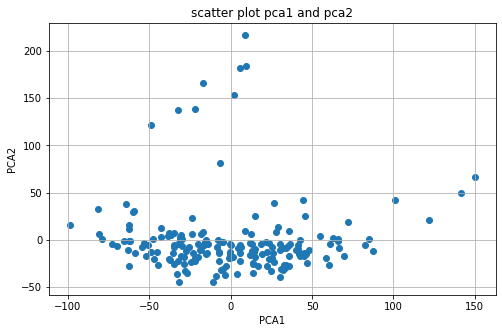

In [87]:
#scatter plot pca1 and pca2
plt.figure(figsize=(8,5))
plt.scatter(df1['PCA1'],df1['PCA2'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('scatter plot pca1 and pca2')
plt.grid()
plt.show()

In [61]:
df2=df1.copy()

In [62]:
#appending expressinal label to data
df2['label1']= list(data_col.iloc[0])
df2['label2']= list(data_col.iloc[1])

In [63]:
df2.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA118,PCA119,PCA120,PCA121,PCA122,PCA123,PCA124,PCA125,label1,label2
0,19.377615,-14.983466,-2.223572,-29.369314,1.294351,-0.555344,-13.681505,-10.432124,-0.366852,-5.874002,...,2.974543,-7.888126,2.364514,-0.470857,-2.209826,-6.431137,0.896279,-3.271887,pancreas-adenocarcinoma-other subtype,invasive adenocarcinoma
1,6.459736,-7.324426,-1.891246,-27.630228,-16.984486,6.185786,6.002569,-13.808433,-11.949418,-14.811068,...,-7.839479,-5.379380,8.657167,-4.665471,3.593615,-0.108637,1.211165,2.326349,pancreas-adenocarcinoma-other subtype,"invasive, well-differentiated"
2,22.107014,-12.287159,-8.406857,52.940910,-28.743177,-6.388737,12.774988,-13.569407,-22.681734,1.003773,...,2.971299,0.379582,-2.751571,-0.019932,-1.150216,2.584731,0.330297,0.395353,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type
3,14.004169,-25.846373,2.487084,13.669195,-4.051844,13.900233,-19.943539,6.014203,9.325456,9.484848,...,2.970882,0.186711,4.680226,0.125146,1.932493,-3.366086,0.130976,-1.290869,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type
4,-14.081422,-4.000463,-13.408875,-10.858805,-13.067190,-16.657902,20.383518,9.752702,-0.402806,-2.505419,...,4.616715,-2.655114,-0.403242,-4.081460,2.745739,-1.466609,0.972502,-0.325315,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type


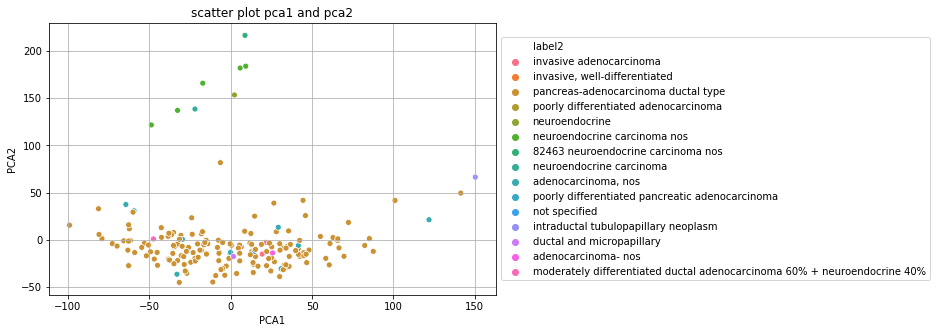

In [99]:
plt.figure(figsize=(8,5))
ax=sns.scatterplot(df2['PCA1'],df2['PCA2'],hue=df2['label2'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('scatter plot pca1 and pca2')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

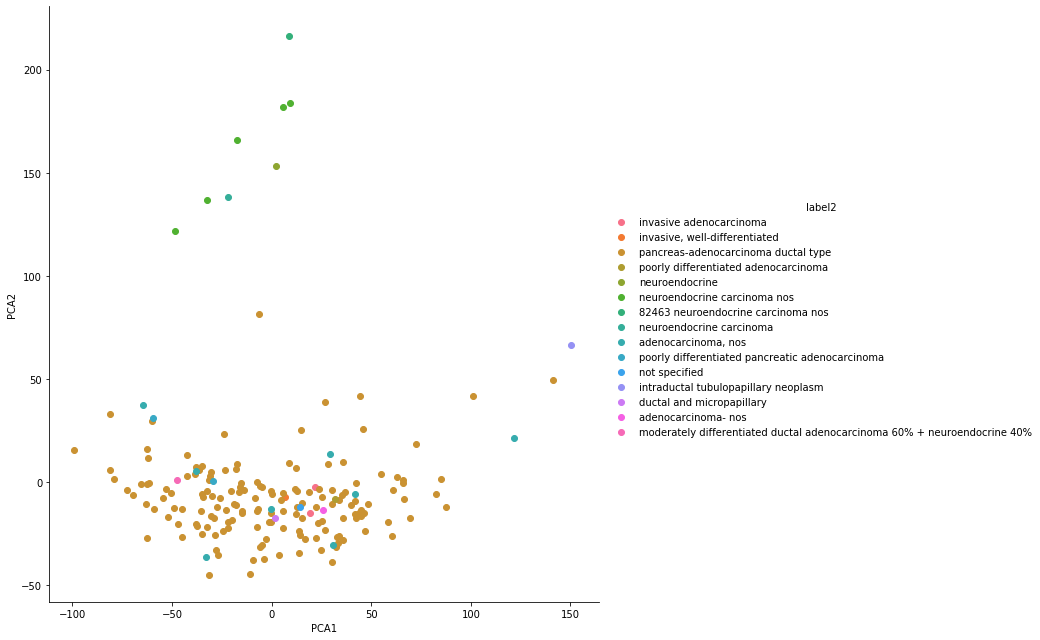

In [64]:
g =sns.FacetGrid(df2,hue='label2',height=9)
g.map(plt.scatter,'PCA1', 'PCA2').add_legend()
plt.show()

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df2['label2'])

In [80]:
def myplot(score,coeff,labels,y):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    from matplotlib.pyplot import figure
    figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

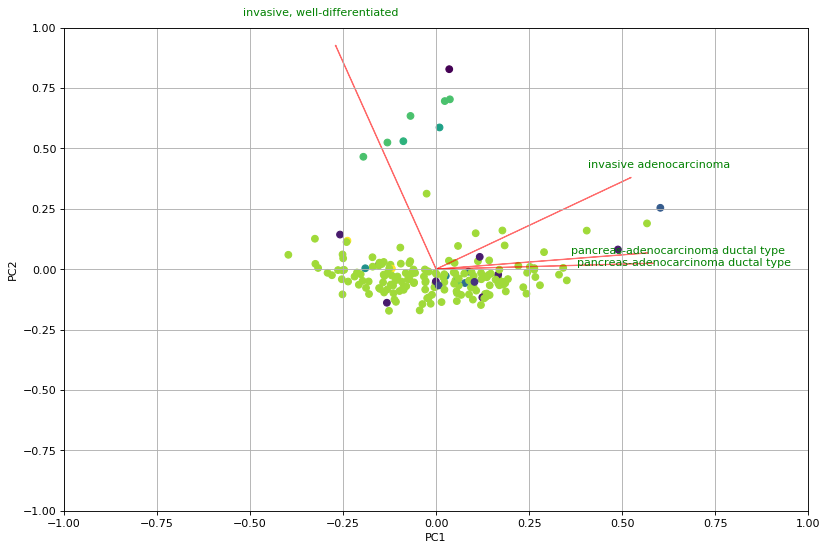

In [81]:
myplot(df[:,0:2],np.transpose(pca.components_[0:2, :]),df2['label2'].values,y)
plt.show()

# What does the analysis say about the general behaviour of the different samples?

# Ans:- Adenocarcinoma sample are forming dense cluster while other one is showing greater variation like Neuroendocrine showing low denser.

#  Are the neuroendocrine tumors clearly separable from the adenocarcinoma tumors?

# Ans:- some neuroendocrine tumors are clrearly separable from adenocarcinoma tumors but very few are overlapped with adenocarcinoma tumors.

# What can be said about the variance of the PCA

# Ans:-  96% variance is captured on eigen vector value 125.

# Question 2

In [100]:
#reading  Type 1 IFN signature
ifn = pd.read_csv('type1_IFN.txt',header=None)

In [101]:
ifn[0].values

array(['IFIT1', 'IFI44', 'IFIT3', 'MX2', 'OAS1', 'OAS3', 'BST2', 'IFITM1',
       'MX1', 'STAT1', 'IFI27', 'CXCL10', 'IFI16', 'IFI30', 'IFIH1',
       'IFIT2', 'IFITM2', 'IRF1', 'IRF9', 'IRGM', 'ISG15', 'OAS2',
       'PSME1', 'SOCS1', 'STAT2'], dtype=object)

In [102]:
#concat informational column and expressional column by condition
new_data =pd.concat([data_row.loc[ifn[0]],data_col.drop('histological_type_other')])

C:\Users\RabiJalan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


In [103]:
#drop NaN value
hx=new_data.dropna()

In [104]:
hx.head(5)

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
IFIT1,9.5,10.5,12.2,10.7,8.6,6.7,9,11.4,8.5,7.2,...,8.3,7.6,9.6,8.7,9.4,8.4,9.5,10.4,11.1,10.2
IFI44,9.4,11.1,11.2,10.6,8.8,8.4,9,11.1,8.6,7.9,...,8.3,8.3,9.8,10,9.3,8.9,9.3,10.6,10.8,10.9
IFIT3,10,10.8,11.6,10.3,9,7.8,9.4,11.5,9.1,9.1,...,7.9,8.3,9.8,9.8,9.6,9.1,9.6,10.5,10.7,10.2
MX2,9.8,10.7,11,10.8,8.3,9.2,9.9,11.1,9.2,9.2,...,9.3,9.2,10,9.2,9.7,9.3,10,11.4,11.5,10.9
OAS1,11.7,11,11.3,10.5,9.2,10.6,10.5,11.4,8.9,7.5,...,8.3,9.5,10.8,8.9,9.5,10.5,10.9,11.1,11.9,10.7


In [105]:
hx.tail(5)

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
OAS2,11.5,11,11.8,11.4,9.1,9.9,10.5,12.1,9,8.9,...,9.3,9,10.5,9.5,10,10.1,10.5,11.3,12.1,12
PSME1,12.3,12.3,12,11.7,11.7,11,11.6,11.9,12.2,11.6,...,11.4,11.7,11.1,11.9,11.4,11.9,12,11.5,12.6,12.2
SOCS1,7.7,7.4,7.9,6.8,7.4,6.3,7.3,7.7,6.5,8.4,...,7.4,7.6,7.2,7.4,7.2,7.2,7.2,7.3,6,8.8
STAT2,11.2,11.3,12,11.7,11.1,11.6,11.4,11.8,10.9,11,...,11.3,11,11.3,11.4,11.1,11.3,11.1,11.8,10.8,11.7
histological_type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type


In [106]:
#transposing 
X=hx.T

In [107]:
#slicing the values
X.iloc[:,1:].values

array([[9.399999618530273, 10.0, 9.800000190734863, ...,
        7.699999809265137, 11.199999809265137,
        'pancreas-adenocarcinoma-other subtype'],
       [11.100000381469727, 10.800000190734863, 10.699999809265137, ...,
        7.400000095367432, 11.300000190734863,
        'pancreas-adenocarcinoma-other subtype'],
       [11.199999809265137, 11.600000381469727, 11.0, ...,
        7.900000095367432, 12.0, 'pancreas-adenocarcinoma ductal type'],
       ...,
       [10.600000381469727, 10.5, 11.399999618530273, ...,
        7.300000190734863, 11.800000190734863,
        'pancreas-adenocarcinoma ductal type'],
       [10.800000190734863, 10.699999809265137, 11.5, ..., 6.0,
        10.800000190734863, 'pancreas-adenocarcinoma ductal type'],
       [10.899999618530273, 10.199999809265137, 10.899999618530273, ...,
        8.800000190734863, 11.699999809265137,
        'pancreas-adenocarcinoma ductal type']], dtype=object)

In [108]:
#taking groupby on histological_type
x1=X.groupby('histological_type').sum()/X.groupby('histological_type').count()

In [110]:
x1.head(5)

,IFIT1,IFI44,IFIT3,MX2,OAS1,OAS3,BST2,IFITM1,MX1,STAT1,...,IFIH1,IFIT2,IFITM2,IRF1,IRF9,ISG15,OAS2,PSME1,SOCS1,STAT2
histological_type,,,,,,,,,,,,,,,,,,,,,
pancreas-adenocarcinoma ductal type,9.181457,9.403974,9.670199,9.605960,10.250331,10.668212,11.466225,11.603311,11.093377,12.068212,...,9.417881,8.663576,12.055629,10.462252,10.666887,10.400662,10.360927,11.888742,6.851656,11.113907
pancreas-adenocarcinoma-other subtype,8.696296,8.374074,8.974074,8.862963,9.444444,9.996296,10.866667,10.862963,10.477778,11.414815,...,8.914815,7.959259,11.385185,10.170370,10.340741,9.692593,9.411111,11.703704,7.033333,10.885185
pancreas-colloid (mucinous non-cystic) carcinoma,8.800000,9.225000,9.825000,9.500000,10.625000,10.800000,10.375000,11.225000,11.025000,12.075000,...,9.575000,8.800000,11.275000,11.200000,10.325000,9.900000,10.450000,11.850000,7.100000,10.975000
pancreas-undifferentiated carcinoma,8.000000,9.700000,9.500000,8.200000,8.600000,10.000000,11.600000,12.900000,9.500000,12.500000,...,8.300000,8.400000,12.700000,10.700000,10.400000,10.200000,9.900000,11.600000,8.100000,11.300000


In [111]:
#setting up the dataframe
x2=pd.DataFrame(x1,index=None, columns=None).T

In [112]:
#visualize the top 5 row
x2.head()

histological_type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-colloid (mucinous non-cystic) carcinoma,pancreas-undifferentiated carcinoma
IFIT1,9.181457,8.696296,8.800,8.0
IFI44,9.403974,8.374074,9.225,9.7
IFIT3,9.670199,8.974074,9.825,9.5
MX2,9.605960,8.862963,9.500,8.2
OAS1,10.250331,9.444444,10.625,8.6


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


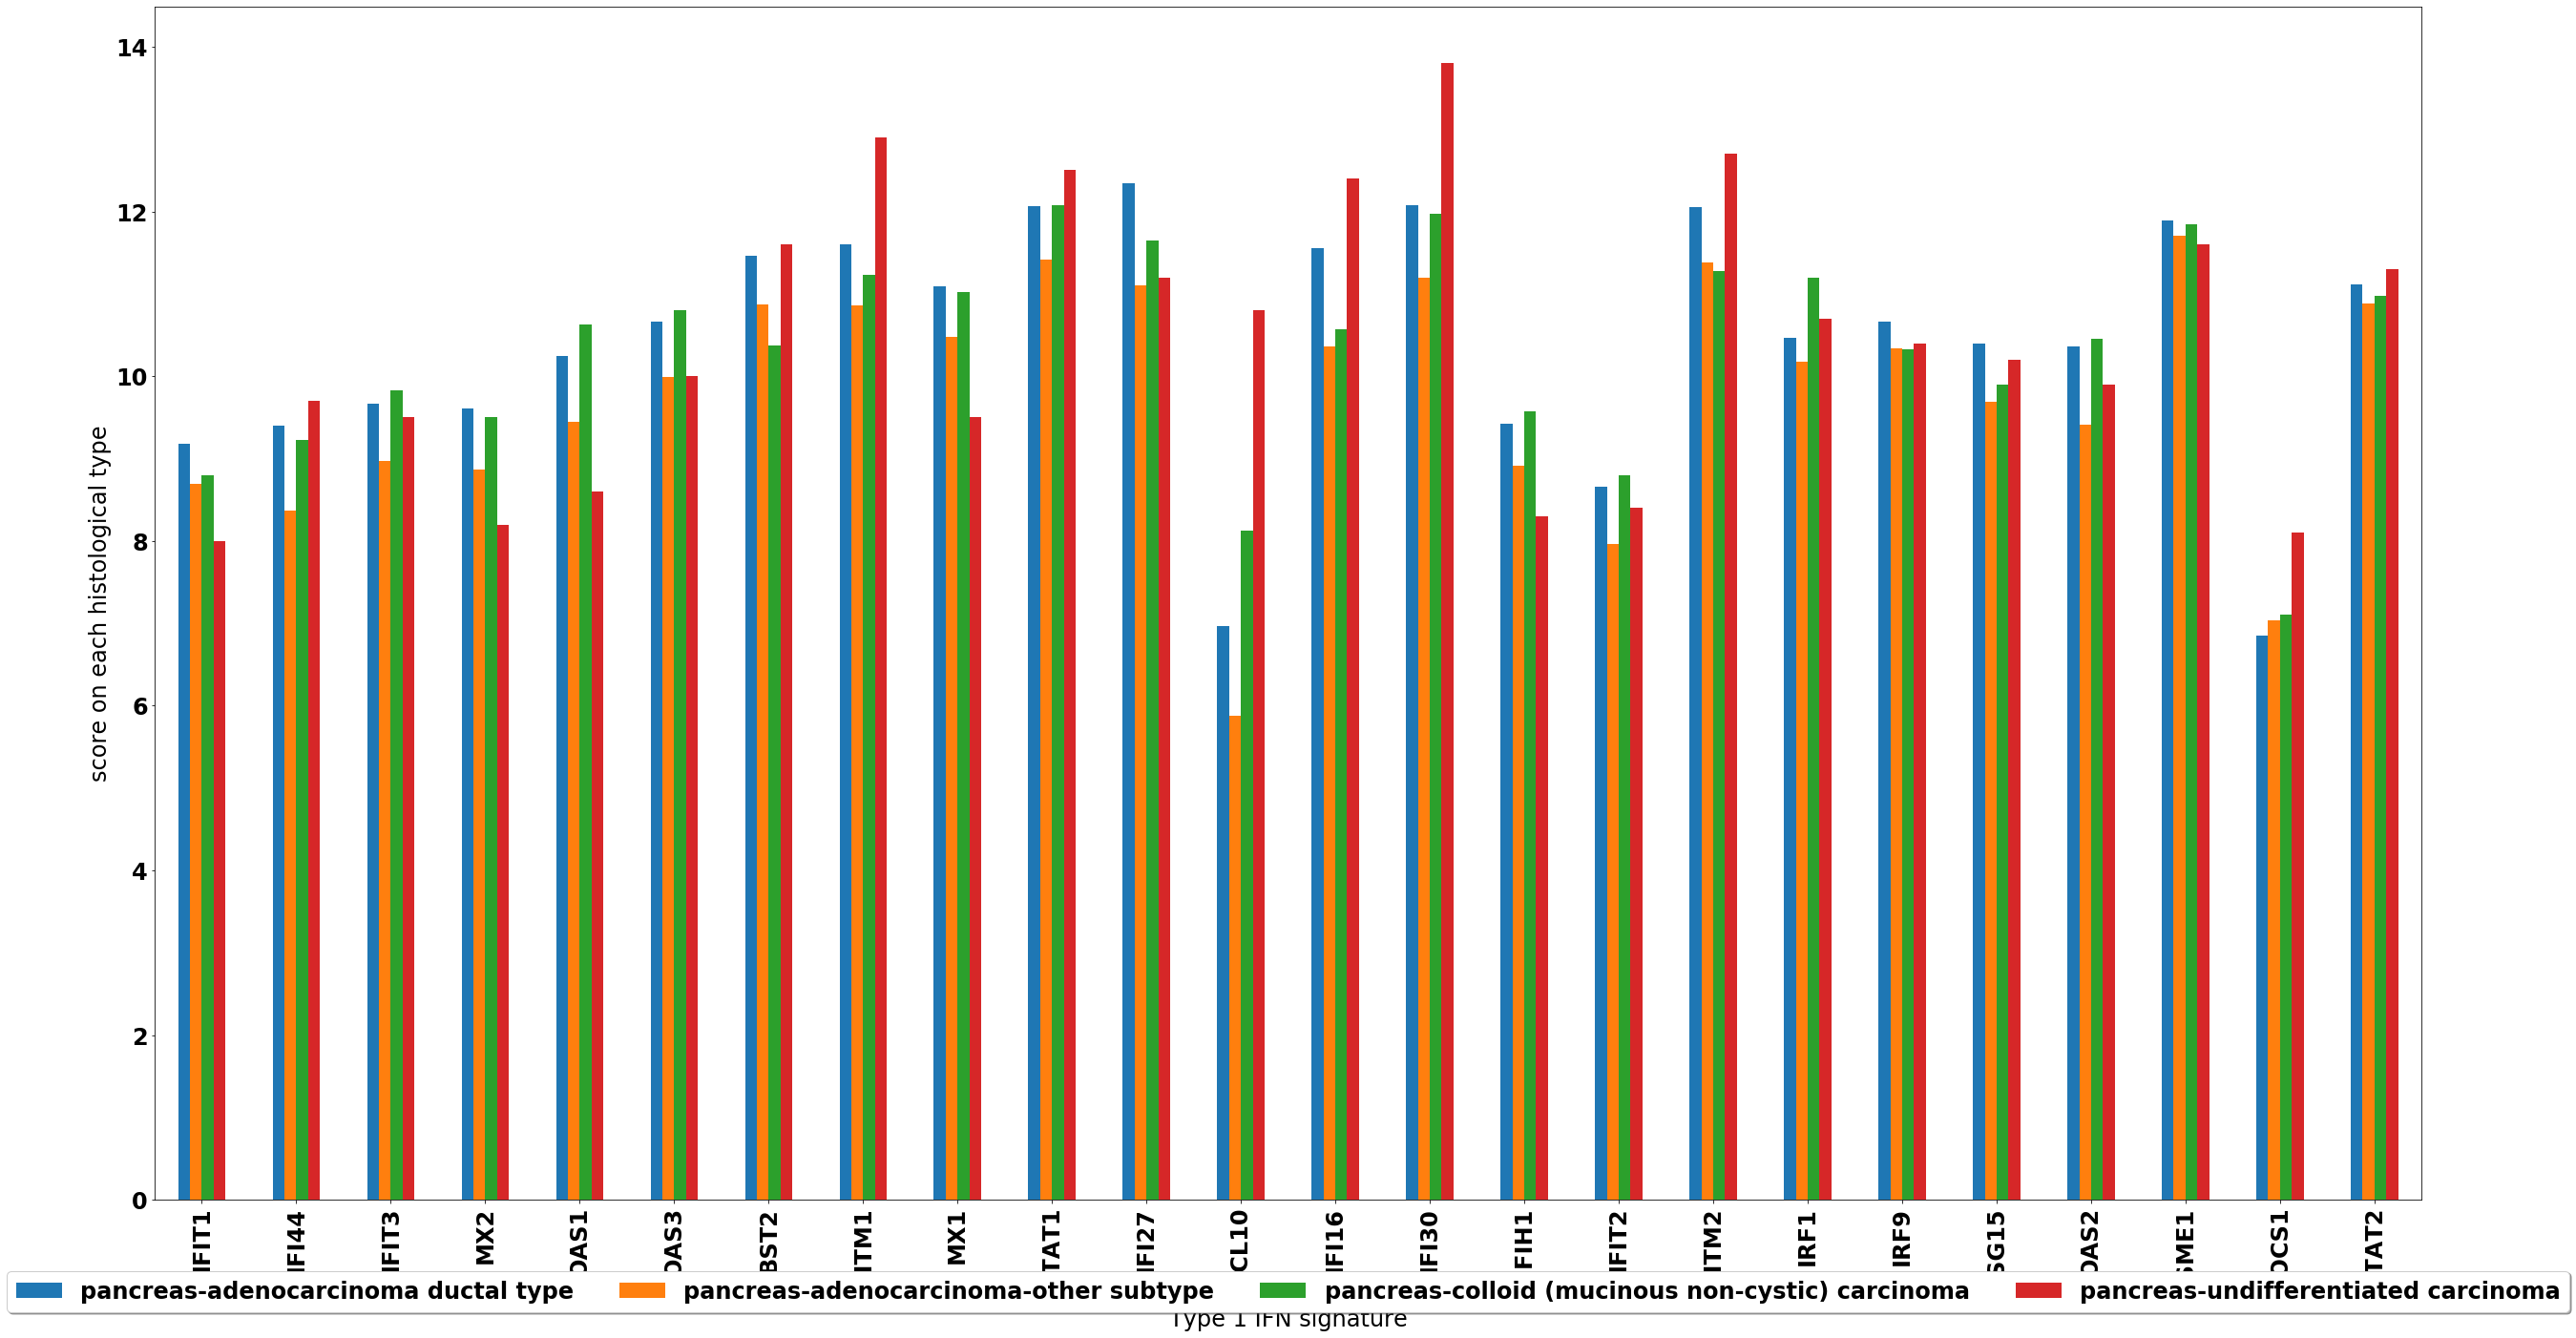

In [113]:
#plotting bar plot of each inferons present in histological type
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}

plt.rc('font', **font)

ax=x2.plot.bar(figsize = (40, 20))
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel('Type 1 IFN signature')
plt.ylabel('score on each histological type')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()

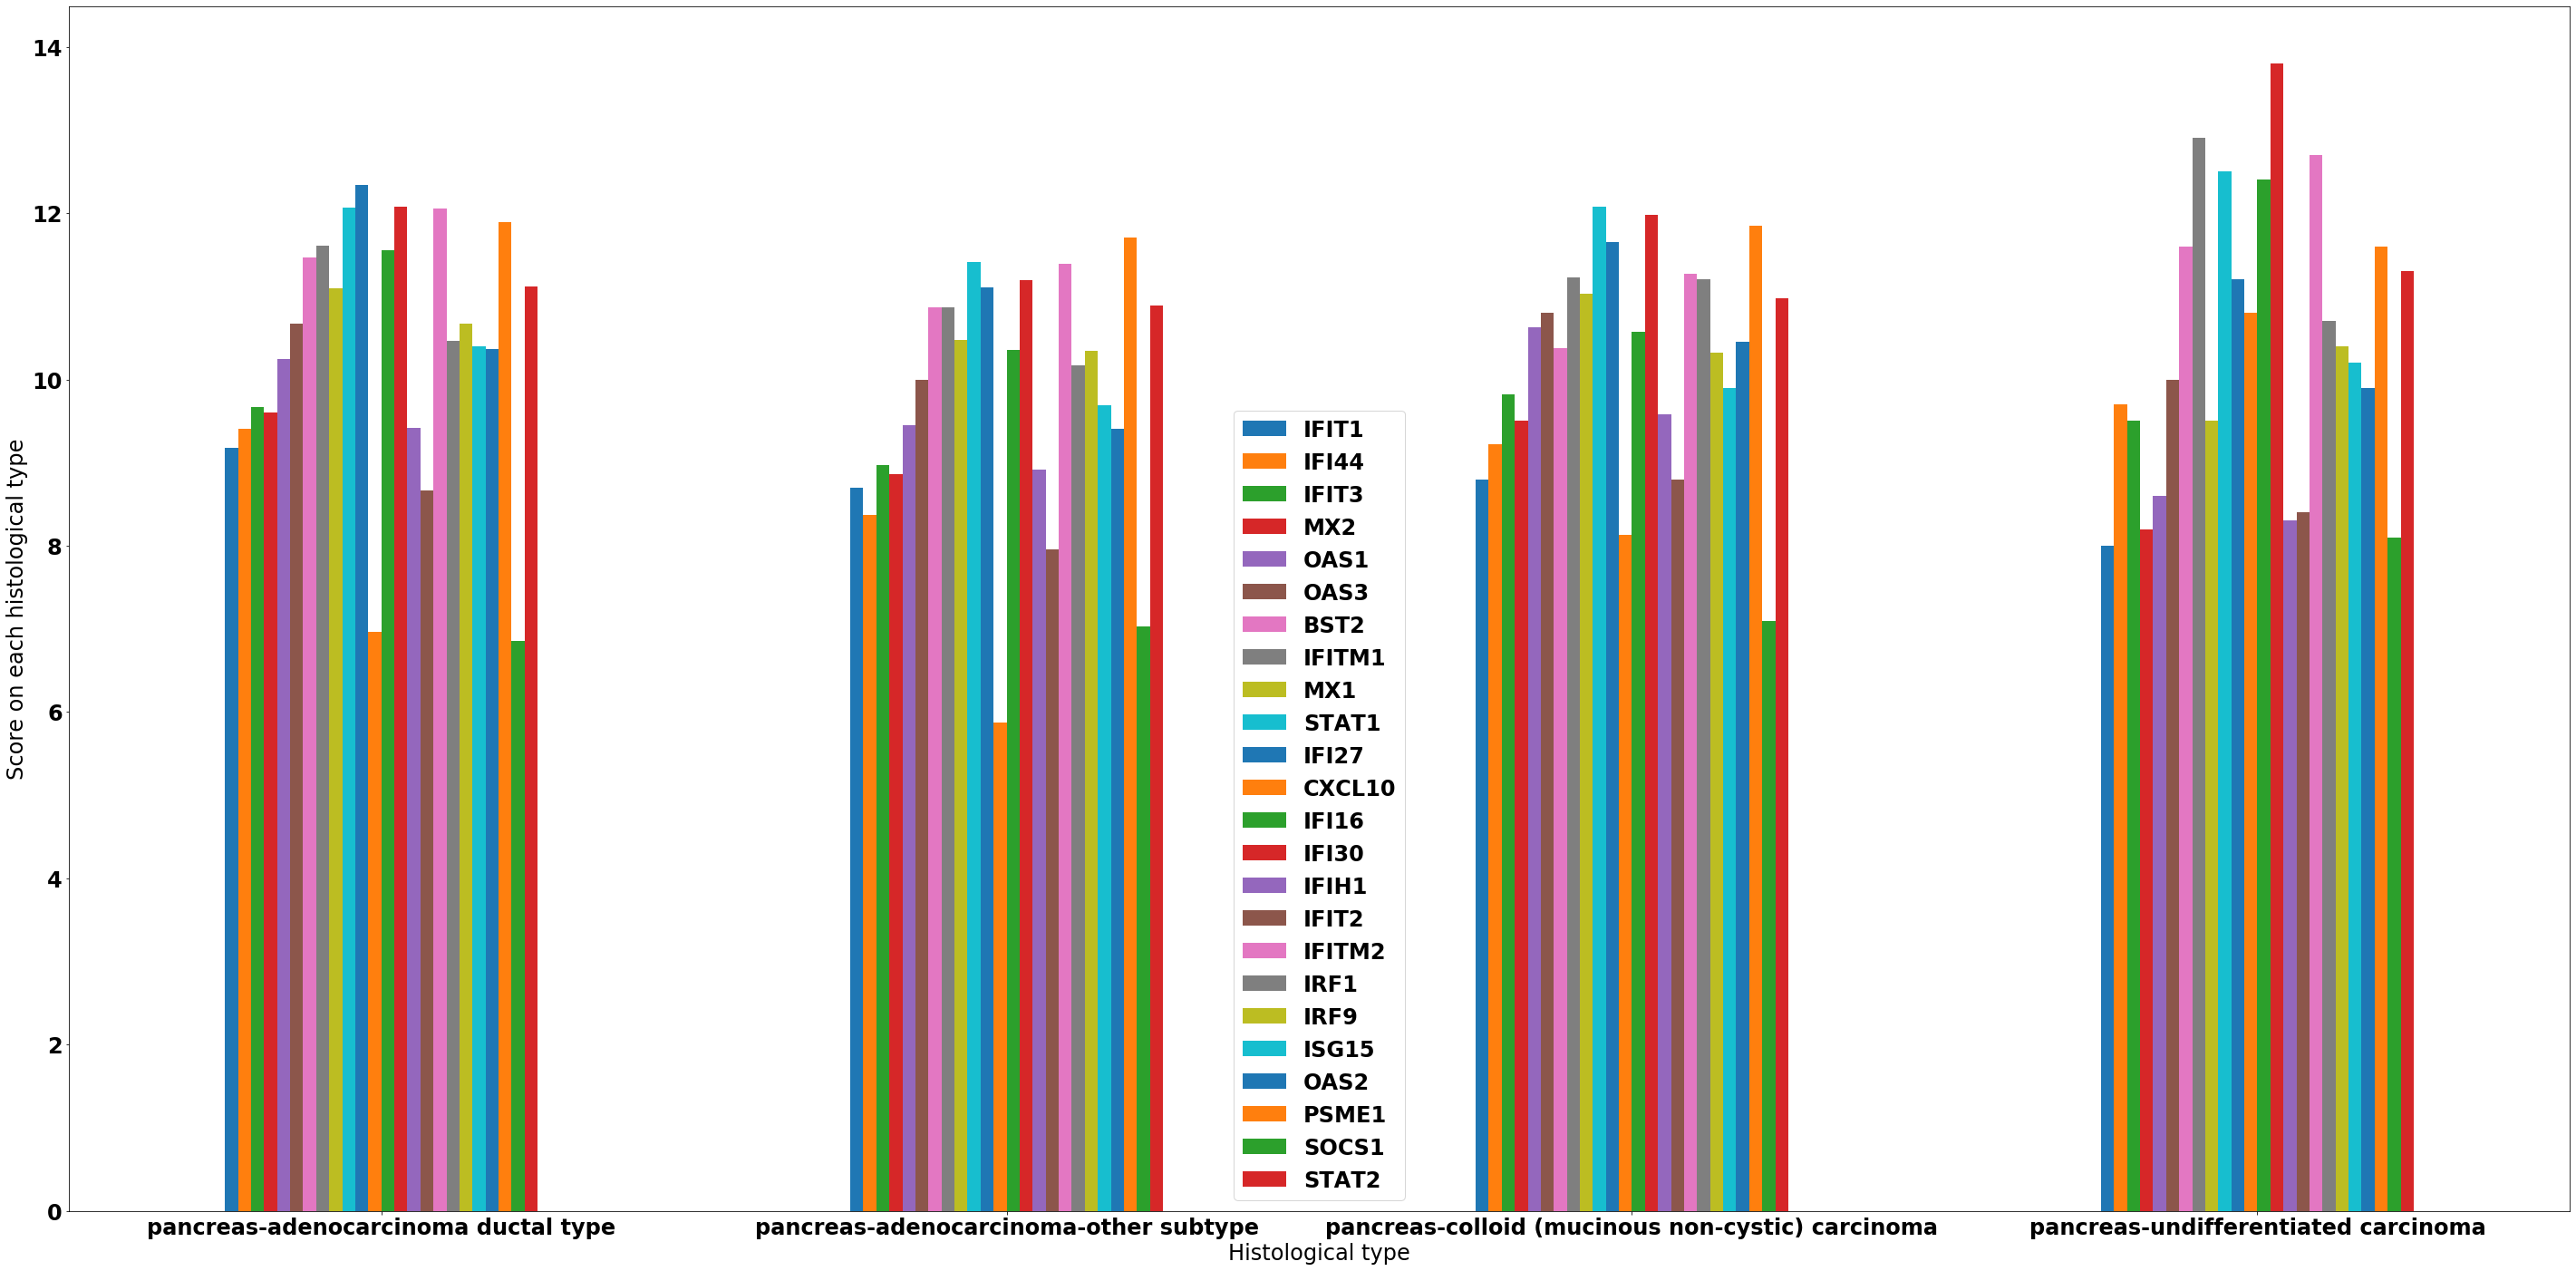

In [114]:
#plotting bar plot of histological type and their correspnding inferons score
ax=x2.T.plot.bar(figsize = (40, 20),rot=0)
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel('Histological type')
plt.ylabel('Score on each histological type')
plt.tight_layout()
plt.show()

# Can you characterize the presence of IFN signature in pancreatic adenocarcinoma tumors by assigning a score to each sample which denotes the positive or negative presence of IFN genes in the sample?

# Ans:- Yes,I can characterize the presence of IFN signature in pancreatic adenocarcinoma tumors and also assigned score to each gene per histological type by taking sum of each the sample gene divide by count of each sample.


# How is the distribution of this score among the different samples?

# Ans:- Distribution of each gene score to each sample type is not varied too much.

# Based on this distribution can we identify the presence of high and low IFN subtypes in PAAD?

# Yes we can identify the presence of IFN in PAAD subtypes.